In [2]:
#Import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

%matplotlib inline



In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Reading the dataset

data = pd.read_csv('/content/drive/MyDrive/diabetes.csv')

In [5]:
data.head(10)

Pregnancies  Glucose  BloodPressure  ...  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72  ...                     0.627   50        1
1            1       85             66  ...                     0.351   31        0
2            8      183             64  ...                     0.672   32        1
3            1       89             66  ...                     0.167   21        0
4            0      137             40  ...                     2.288   33        1
5            5      116             74  ...                     0.201   30        0
6            3       78             50  ...                     0.248   26        1
7           10      115              0  ...                     0.134   29        0
8            2      197             70  ...                     0.158   53        1
9            8      125             96  ...                     0.232   54        1

[10 rows x 9 columns]

In [6]:
data.shape

(768, 9)

In [7]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
data.isnull().values.any()

False

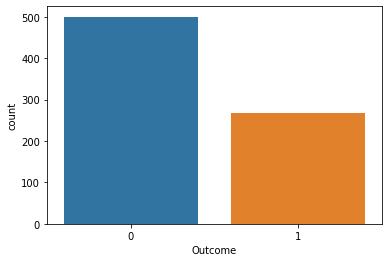

In [10]:
sns.countplot(x = 'Outcome', data= data)

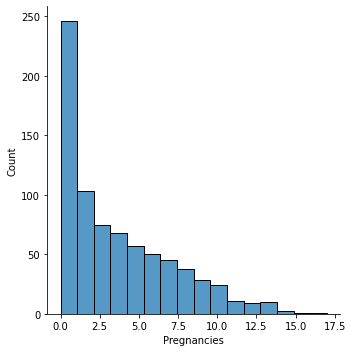

In [11]:
sns.displot(data['Pregnancies'])

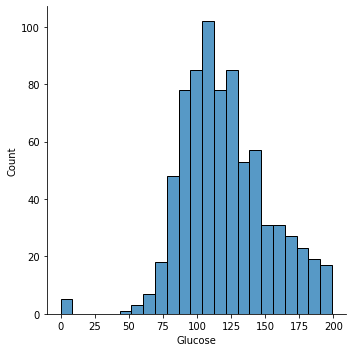

In [12]:
sns.displot(data['Glucose'])

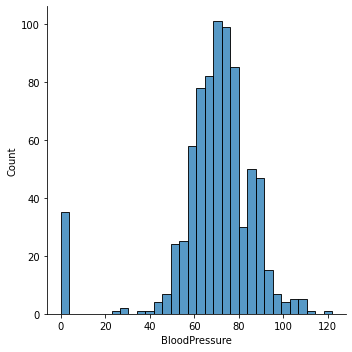

In [13]:
sns.displot(data['BloodPressure'])

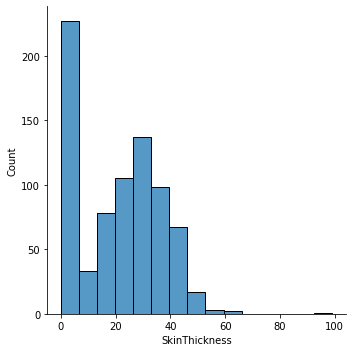

In [14]:
sns.displot(data['SkinThickness'])

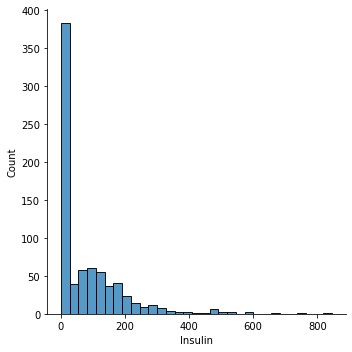

In [15]:
sns.displot(data['Insulin'])

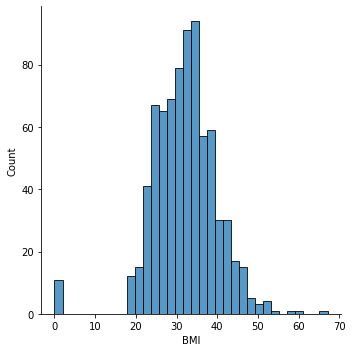

In [16]:
sns.displot(data['BMI'])

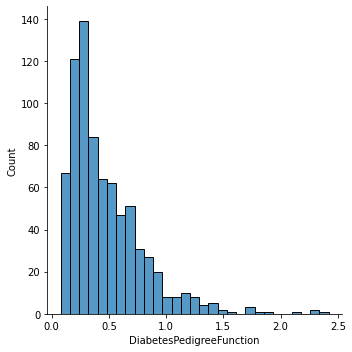

In [17]:
sns.displot(data['DiabetesPedigreeFunction'])

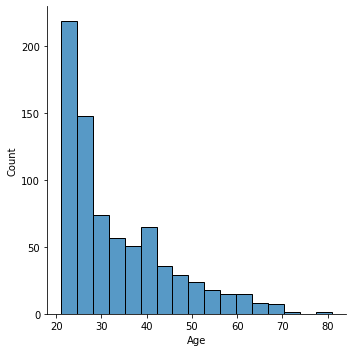

In [18]:
sns.displot(data['Age'])

In [19]:
data.corr()

Pregnancies   Glucose  ...       Age   Outcome
Pregnancies                  1.000000  0.129459  ...  0.544341  0.221898
Glucose                      0.129459  1.000000  ...  0.263514  0.466581
BloodPressure                0.141282  0.152590  ...  0.239528  0.065068
SkinThickness               -0.081672  0.057328  ... -0.113970  0.074752
Insulin                     -0.073535  0.331357  ... -0.042163  0.130548
BMI                          0.017683  0.221071  ...  0.036242  0.292695
DiabetesPedigreeFunction    -0.033523  0.137337  ...  0.033561  0.173844
Age                          0.544341  0.263514  ...  1.000000  0.238356
Outcome                      0.221898  0.466581  ...  0.238356  1.000000

[9 rows x 9 columns]

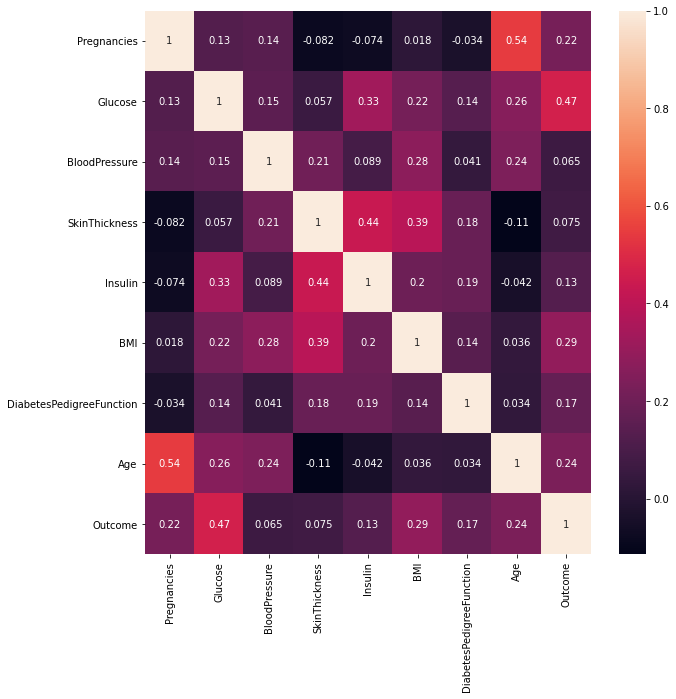

In [20]:
matrix = data.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(matrix,annot = True)

In [21]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [23]:
print("Total no. of rows : {0}",format(len(data)))
print("No. of rows missing pregnencies : {0}",format(len(data.loc[data['Pregnancies']==0])))
print("No. of rows missing Glucose : {0}",format(len(data.loc[data['Glucose']==0])))
print("No. of rows missing BloodPressure : {0}",format(len(data.loc[data['BloodPressure']==0])))
print("No. of rows missing SkinThickness : {0}",format(len(data.loc[data['SkinThickness']==0])))
print("No. of rows missing Insulin : {0}",format(len(data.loc[data['Insulin']==0])))
print("No. of rows missing BMI : {0}",format(len(data.loc[data['BMI']==0])))
print("No. of rows missing DiabetesPedigreeFunction : {0}",format(len(data.loc[data['DiabetesPedigreeFunction']==0])))
print("No. of rows missing Age : {0}",format(len(data.loc[data['Age']==0])))



Total no. of rows : {0} 768
No. of rows missing pregnencies : {0} 111
No. of rows missing Glucose : {0} 5
No. of rows missing BloodPressure : {0} 35
No. of rows missing SkinThickness : {0} 227
No. of rows missing Insulin : {0} 374
No. of rows missing BMI : {0} 11
No. of rows missing DiabetesPedigreeFunction : {0} 0
No. of rows missing Age : {0} 0


In [24]:
from sklearn.impute import SimpleImputer

In [25]:
fill_values = SimpleImputer(missing_values=0,strategy='mean')
X_train = fill_values.fit_transform(X_train)
X_test = fill_values.fit_transform(X_test)


**a**. **Random** **Forests**


In [26]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 200)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [27]:
predictions = rfc.predict(X_test)

In [28]:
from sklearn import metrics
print("Accuracy_Score=",format(metrics.accuracy_score(y_test, predictions)))

Accuracy_Score= 0.7922077922077922


In [30]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))


[[128  22]
 [ 26  55]]
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       150
           1       0.71      0.68      0.70        81

    accuracy                           0.79       231
   macro avg       0.77      0.77      0.77       231
weighted avg       0.79      0.79      0.79       231



**b. Decision Trees**

In [31]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [32]:
predictions = dtree.predict(X_test)

In [33]:
from sklearn import metrics

print("Accuracy_Score=",format(metrics.accuracy_score(y_test,predictions)))

Accuracy_Score= 0.7662337662337663


In [34]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))


[[126  24]
 [ 30  51]]
              precision    recall  f1-score   support

           0       0.81      0.84      0.82       150
           1       0.68      0.63      0.65        81

    accuracy                           0.77       231
   macro avg       0.74      0.73      0.74       231
weighted avg       0.76      0.77      0.76       231



**c. XGBoost**

In [35]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(gamma = 0)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [36]:
xgb_pred = xgb_model.predict(X_test)

In [37]:
from sklearn import metrics
print("Accuracy_Score = ",format(metrics.accuracy_score(y_test, xgb_pred)))

Accuracy_Score =  0.7575757575757576


In [38]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test,xgb_pred))
print(classification_report(y_test,xgb_pred))


[[122  28]
 [ 28  53]]
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       150
           1       0.65      0.65      0.65        81

    accuracy                           0.76       231
   macro avg       0.73      0.73      0.73       231
weighted avg       0.76      0.76      0.76       231



**d. Support Vector Machine(SVM)**

In [41]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [42]:
svc_pred = svc_model.predict(X_test)

In [43]:
from sklearn import metrics

print("Accuracy_Score = ",format(metrics.accuracy_score(y_test, svc_pred)))

Accuracy_Score =  0.7705627705627706


In [44]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test,svc_pred))
print(classification_report(y_test,svc_pred))


[[137  13]
 [ 40  41]]
              precision    recall  f1-score   support

           0       0.77      0.91      0.84       150
           1       0.76      0.51      0.61        81

    accuracy                           0.77       231
   macro avg       0.77      0.71      0.72       231
weighted avg       0.77      0.77      0.76       231



**Feature** **Importances**

In [45]:
rfc.feature_importances_

array([0.07673585, 0.26250244, 0.08617336, 0.07450533, 0.08795392,
       0.15408508, 0.12496742, 0.1330766 ])

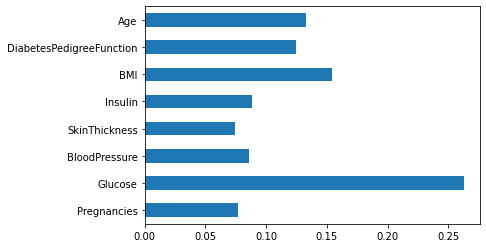

In [46]:
(pd.Series(rfc.feature_importances_, index=X.columns).plot(kind='barh'))

**Predictions**

In [47]:
print("Prediction Probabilities")
rfc.predict_proba(X_test)

Prediction Probabilities


array([[0.435, 0.565],
       [0.135, 0.865],
       [0.86 , 0.14 ],
       [0.59 , 0.41 ],
       [0.935, 0.065],
       [0.42 , 0.58 ],
       [0.205, 0.795],
       [0.835, 0.165],
       [0.475, 0.525],
       [0.775, 0.225],
       [0.985, 0.015],
       [0.82 , 0.18 ],
       [0.685, 0.315],
       [0.605, 0.395],
       [0.705, 0.295],
       [0.25 , 0.75 ],
       [0.17 , 0.83 ],
       [0.945, 0.055],
       [0.445, 0.555],
       [0.98 , 0.02 ],
       [0.675, 0.325],
       [0.695, 0.305],
       [0.385, 0.615],
       [0.745, 0.255],
       [0.91 , 0.09 ],
       [0.215, 0.785],
       [0.93 , 0.07 ],
       [0.535, 0.465],
       [0.985, 0.015],
       [0.515, 0.485],
       [0.195, 0.805],
       [0.55 , 0.45 ],
       [0.495, 0.505],
       [0.505, 0.495],
       [0.905, 0.095],
       [0.855, 0.145],
       [0.585, 0.415],
       [0.25 , 0.75 ],
       [0.21 , 0.79 ],
       [0.945, 0.055],
       [0.92 , 0.08 ],
       [0.4  , 0.6  ],
       [0.885, 0.115],
       [0.4